# Atividade Prática. 
# Prazo: 08/Novembro
- Base: Diabetes Diagnostic
- Link: https://www.kaggle.com/houcembenmansour/predict-diabetes-based-on-diagnostic-measures

# Data Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data = pd.read_csv('./base/diabetes.csv')

Before making anything like feature selection, feature extraction and classification, we start with basic data analysis. 
Lets look at features of data.

In [3]:
display(data)  # head method shows only first 5 rows

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,227,105,44,"5,2",83,female,59,125,"25,2",150,90,35,40,"0,88",No diabetes
386,387,226,279,52,"4,3",84,female,60,192,"37,5",144,88,41,48,"0,85",Diabetes
387,388,301,90,118,"2,6",89,female,61,115,"21,7",218,90,31,41,"0,76",No diabetes
388,389,232,184,114,2,91,female,61,127,24,170,82,35,38,"0,92",Diabetes


# Vamos fazer uma cópia do Dataframe

In [4]:
df = data.copy()

In [5]:
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


# Vamos converter a classe para número

In [6]:
#Mas antes vamos ver a distribuição
df['diabetes'].value_counts()

No diabetes    330
Diabetes        60
Name: diabetes, dtype: int64

In [7]:
dicionario = {'No diabetes':0, 'Diabetes':1}
df['diabetes'] = df['diabetes'].map(dicionario) 

In [8]:
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",0
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",0
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",0
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",0
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",0


# Vamos converter o Gênero

In [9]:
df = pd.concat([df,pd.get_dummies(df['gender'], prefix='gender')],axis=1)
df.drop(['gender'],axis=1, inplace=True)

In [10]:
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes,gender_female,gender_male
0,1,193,77,49,"3,9",19,61,119,"22,5",118,70,32,38,"0,84",0,1,0
1,2,146,79,41,"3,6",19,60,135,"26,4",108,58,33,40,"0,83",0,1,0
2,3,217,75,54,4,20,67,187,"29,3",110,72,40,45,"0,89",0,1,0
3,4,226,97,70,"3,2",20,64,114,"19,6",122,64,31,39,"0,79",0,1,0
4,5,164,91,67,"2,4",20,70,141,"20,2",122,86,32,39,"0,82",0,1,0


# Converter a vírgula pelo ponto

In [11]:
df['chol_hdl_ratio'] = df['chol_hdl_ratio'].str.replace(',', '.')

In [12]:
df['bmi'] = df['bmi'].str.replace(',', '.')

In [13]:
df['waist_hip_ratio'] = df['waist_hip_ratio'].str.replace(',','.')

In [14]:
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes,gender_female,gender_male
0,1,193,77,49,3.9,19,61,119,22.5,118,70,32,38,0.84,0,1,0
1,2,146,79,41,3.6,19,60,135,26.4,108,58,33,40,0.83,0,1,0
2,3,217,75,54,4,20,67,187,29.3,110,72,40,45,0.89,0,1,0
3,4,226,97,70,3.2,20,64,114,19.6,122,64,31,39,0.79,0,1,0
4,5,164,91,67,2.4,20,70,141,20.2,122,86,32,39,0.82,0,1,0


## Remoção de atributos irrelevantes

In [15]:
# feature names as an Index (panda object including a list of column names and dtype)
col = df.columns       # .columns gives columns names in data 
print(col)

Index(['patient_number', 'cholesterol', 'glucose', 'hdl_chol',
       'chol_hdl_ratio', 'age', 'height', 'weight', 'bmi', 'systolic_bp',
       'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio', 'diabetes',
       'gender_female', 'gender_male'],
      dtype='object')


In [16]:
df.columns

Index(['patient_number', 'cholesterol', 'glucose', 'hdl_chol',
       'chol_hdl_ratio', 'age', 'height', 'weight', 'bmi', 'systolic_bp',
       'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio', 'diabetes',
       'gender_female', 'gender_male'],
      dtype='object')

In [17]:
X = df.drop(['patient_number','diabetes'],axis = 1)
y = df['diabetes']  

In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [19]:
X

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,gender_female,gender_male
0,193,77,49,3.9,19,61,119,22.5,118,70,32,38,0.84,1,0
1,146,79,41,3.6,19,60,135,26.4,108,58,33,40,0.83,1,0
2,217,75,54,4,20,67,187,29.3,110,72,40,45,0.89,1,0
3,226,97,70,3.2,20,64,114,19.6,122,64,31,39,0.79,1,0
4,164,91,67,2.4,20,70,141,20.2,122,86,32,39,0.82,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,227,105,44,5.2,83,59,125,25.2,150,90,35,40,0.88,1,0
386,226,279,52,4.3,84,60,192,37.5,144,88,41,48,0.85,1,0
387,301,90,118,2.6,89,61,115,21.7,218,90,31,41,0.76,1,0
388,232,184,114,2,91,61,127,24,170,82,35,38,0.92,1,0


## Distruição das amostras entre as classes

In [20]:
y.value_counts()

0    330
1     60
Name: diabetes, dtype: int64

No Diabetes:  330
Diabetes :  60


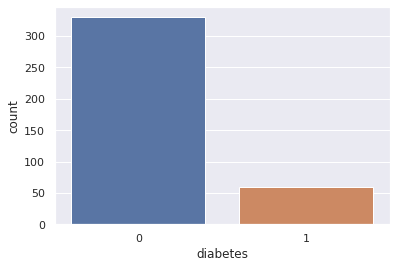

In [21]:
sns.set(style="darkgrid")
ax = sns.countplot(x = y)       # M = 212, B = 357
N, S = y.value_counts(sort=True) #sort=True (default) in order to be sure B, M are in the right order (alphabetical)
print('No Diabetes: ',N)
print('Diabetes : ',S)

# Balancemaneto das classes

In [22]:
smt = SMOTE()
X,y = smt.fit_resample(X,y) 

# Rever a distruição das amostras entre as classes

No Diabetes:  330
Diabetes :  330


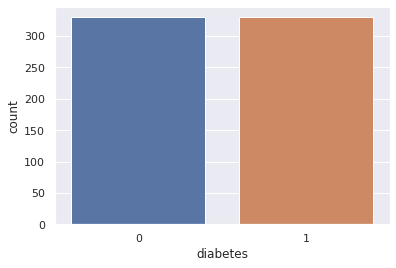

In [23]:
sns.set(style="darkgrid")
ax = sns.countplot(x = y)       # M = 212, B = 357
N, S = y.value_counts(sort=True) #sort=True (default) in order to be sure B, M are in the right order (alphabetical)
print('No Diabetes: ',N)
print('Diabetes : ',S)

### Verifica se há dados faltantes

In [24]:
#check if there is a NaN value in our data frame x, a False indicates there are no missing values
X.isnull().values.any()

False

Let's now use the describe function in order to look at our features :

In [25]:
X

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,gender_female,gender_male
0,193,77,49,3.9,19,61,119,22.5,118,70,32,38,0.84,1,0
1,146,79,41,3.6,19,60,135,26.4,108,58,33,40,0.83,1,0
2,217,75,54,4.0,20,67,187,29.3,110,72,40,45,0.89,1,0
3,226,97,70,3.2,20,64,114,19.6,122,64,31,39,0.79,1,0
4,164,91,67,2.4,20,70,141,20.2,122,86,32,39,0.82,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,271,353,40,6.690464,65,68,194,29.217936,145,89,40,42,0.946474,0,1
656,270,129,36,7.552358,44,59,206,41.497979,119,70,41,48,0.864899,1,0
657,245,119,31,8.165698,40,64,169,28.382389,146,95,36,40,0.887963,0,0
658,261,208,47,5.581888,68,65,160,26.871236,156,86,34,41,0.844292,0,0


In [26]:
X.shape

(660, 15)

## Normalização dos dados

In [27]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
data_normal = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [28]:
data_normal

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,gender_female,gender_male
0,0.315068,0.086053,0.342593,0.134831,0.000000,0.375000,0.088496,0.179803,0.17500,0.289474,0.200000,0.235294,0.347826,1.0,0.0
1,0.186301,0.091988,0.268519,0.117978,0.000000,0.333333,0.159292,0.275862,0.11250,0.131579,0.233333,0.294118,0.326087,1.0,0.0
2,0.380822,0.080119,0.388889,0.140449,0.013699,0.625000,0.389381,0.347291,0.12500,0.315789,0.466667,0.441176,0.456522,1.0,0.0
3,0.405479,0.145401,0.537037,0.095506,0.013699,0.500000,0.066372,0.108374,0.20000,0.210526,0.166667,0.264706,0.239130,1.0,0.0
4,0.235616,0.127596,0.509259,0.050562,0.013699,0.750000,0.185841,0.123153,0.20000,0.500000,0.200000,0.264706,0.304348,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.528767,0.905045,0.259259,0.291599,0.630137,0.666667,0.420354,0.345269,0.34375,0.539474,0.466667,0.352941,0.579292,0.0,1.0
656,0.526027,0.240356,0.222222,0.340020,0.342466,0.291667,0.473451,0.647733,0.18125,0.289474,0.500000,0.529412,0.401954,1.0,0.0
657,0.457534,0.210682,0.175926,0.374477,0.287671,0.500000,0.309735,0.324689,0.35000,0.618421,0.333333,0.294118,0.452094,0.0,0.0
658,0.501370,0.474777,0.324074,0.229320,0.671233,0.541667,0.269912,0.287469,0.41250,0.500000,0.266667,0.323529,0.357157,0.0,0.0


# Visualização
-- https://mode.com/blog/violin-plot-examples/


In [29]:
def violin_plot(beginning,end):
    dados = pd.concat([y,data_normal.iloc[:,beginning:end]],axis=1)
    dados = pd.melt(dados, id_vars='diabetes', var_name="features", value_name='value')
    plt.figure(figsize=(10,10))
    sns.violinplot(x='features', y='value', hue='diabetes', data=dados, split=True, inner="box")
    plt.xticks(rotation=45)

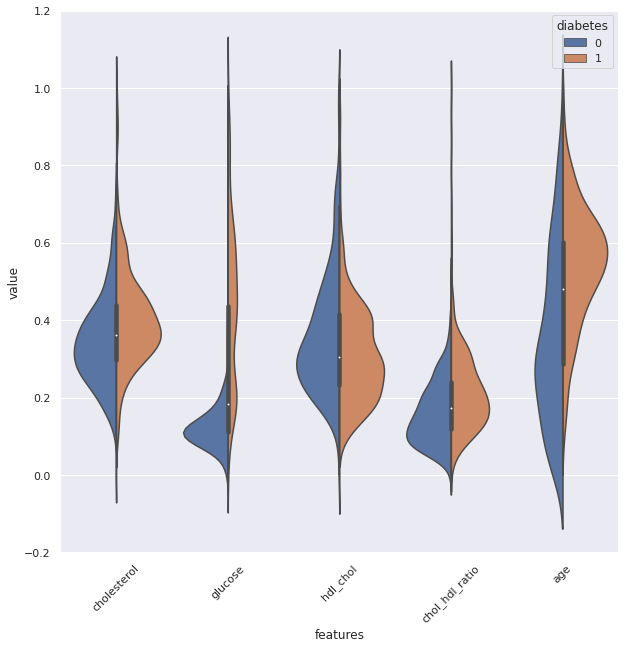

In [30]:
# first ten features
violin_plot(0,5)

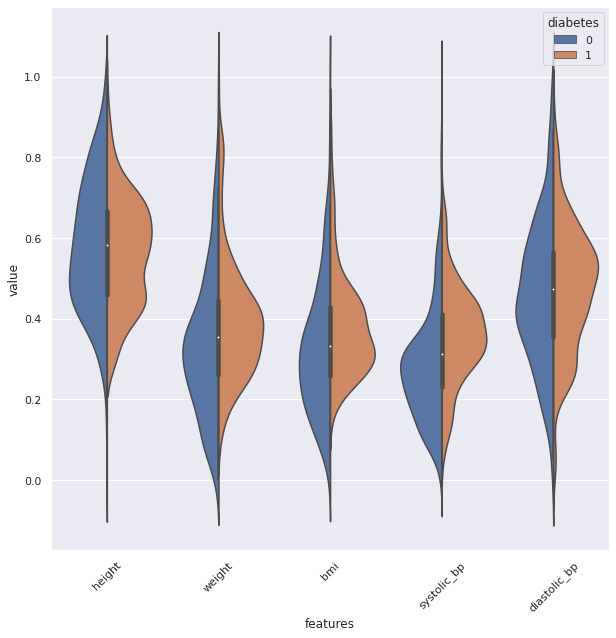

In [31]:
# Second ten features
violin_plot(5,10)

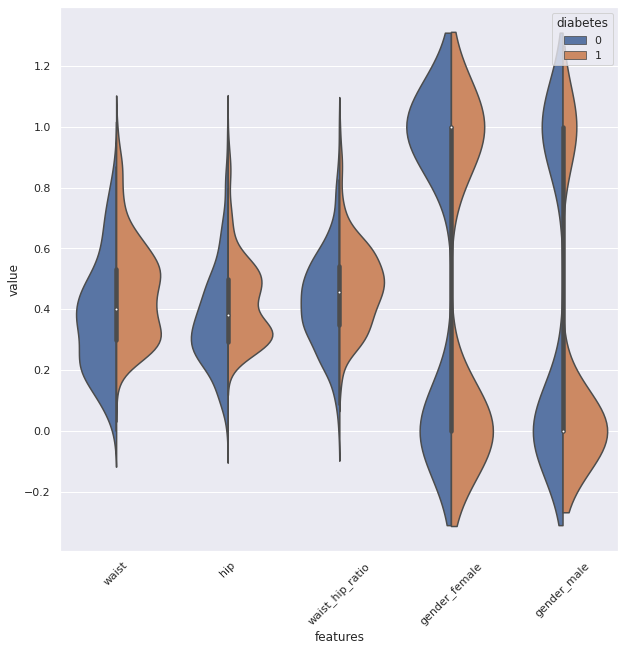

In [32]:
# Third ten features
violin_plot(10,15)

In [33]:
data_normal.columns

Index(['cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'height',
       'weight', 'bmi', 'systolic_bp', 'diastolic_bp', 'waist', 'hip',
       'waist_hip_ratio', 'gender_female', 'gender_male'],
      dtype='object')

# Aqui, acho que questão de atualização de pacotes no meu não funcionou o regg com dois g.

In [34]:
def joint_plot(feature1, feature2):
    """ I have a FutureWarning on this function, anyone knows how to get rid of it ?"""
    sns.jointplot(data_normal.loc[:,feature1], data_normal.loc[:,feature2], kind="reg", color="#ce1414")

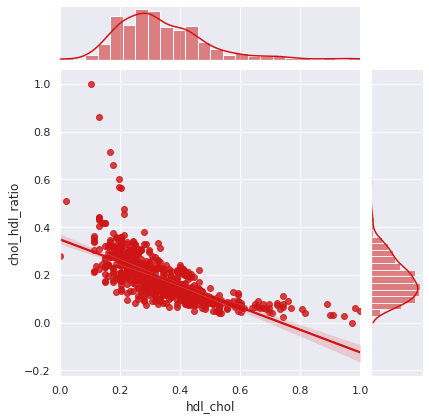

In [35]:
joint_plot('hdl_chol','chol_hdl_ratio')
#joint_plot("radius_worst","smoothness_worst")

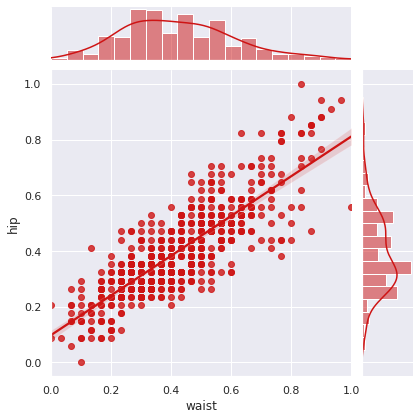

In [36]:
joint_plot("waist","hip")

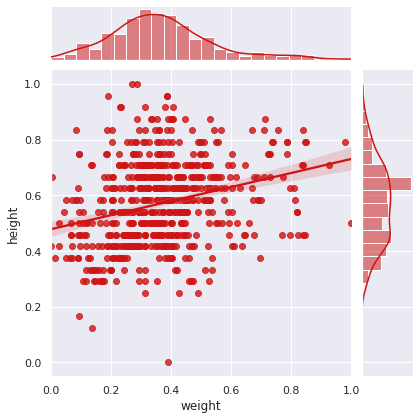

In [37]:
joint_plot('weight','height')

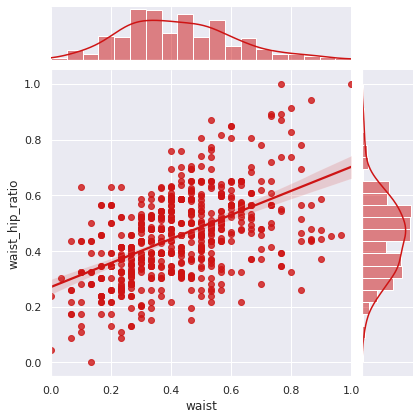

In [38]:
joint_plot('waist','waist_hip_ratio')

## Mapa de calor com a correlação entre os atributos

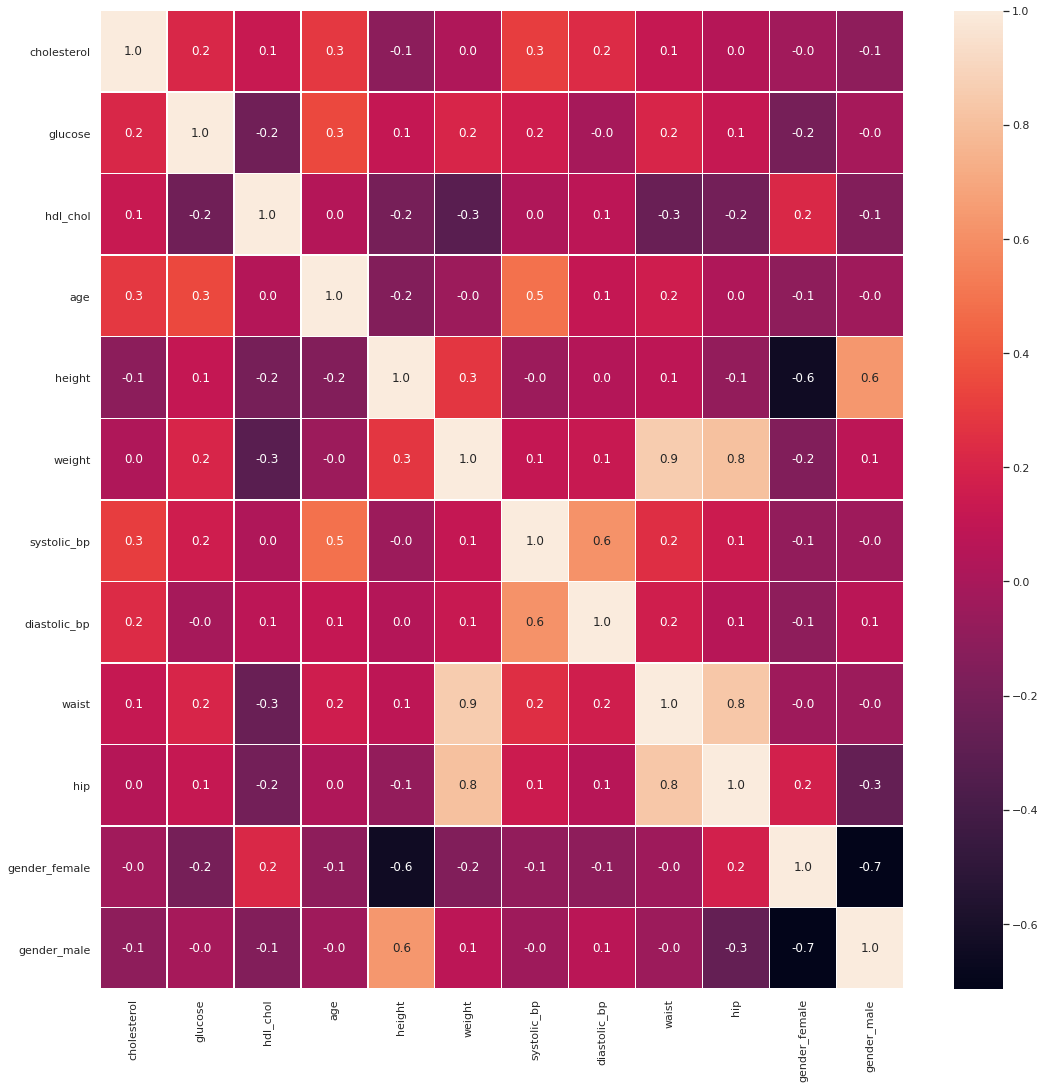

In [39]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
ax = sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Executando o Random Forest com todos os atributos

In [40]:
display(data_normal)

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,gender_female,gender_male
0,0.315068,0.086053,0.342593,0.134831,0.000000,0.375000,0.088496,0.179803,0.17500,0.289474,0.200000,0.235294,0.347826,1.0,0.0
1,0.186301,0.091988,0.268519,0.117978,0.000000,0.333333,0.159292,0.275862,0.11250,0.131579,0.233333,0.294118,0.326087,1.0,0.0
2,0.380822,0.080119,0.388889,0.140449,0.013699,0.625000,0.389381,0.347291,0.12500,0.315789,0.466667,0.441176,0.456522,1.0,0.0
3,0.405479,0.145401,0.537037,0.095506,0.013699,0.500000,0.066372,0.108374,0.20000,0.210526,0.166667,0.264706,0.239130,1.0,0.0
4,0.235616,0.127596,0.509259,0.050562,0.013699,0.750000,0.185841,0.123153,0.20000,0.500000,0.200000,0.264706,0.304348,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.528767,0.905045,0.259259,0.291599,0.630137,0.666667,0.420354,0.345269,0.34375,0.539474,0.466667,0.352941,0.579292,0.0,1.0
656,0.526027,0.240356,0.222222,0.340020,0.342466,0.291667,0.473451,0.647733,0.18125,0.289474,0.500000,0.529412,0.401954,1.0,0.0
657,0.457534,0.210682,0.175926,0.374477,0.287671,0.500000,0.309735,0.324689,0.35000,0.618421,0.333333,0.294118,0.452094,0.0,0.0
658,0.501370,0.474777,0.324074,0.229320,0.671233,0.541667,0.269912,0.287469,0.41250,0.500000,0.266667,0.323529,0.357157,0.0,0.0


Recall is:  1.0
Accuracy is:  0.9696969696969697
F1 score is:  0.9662921348314606


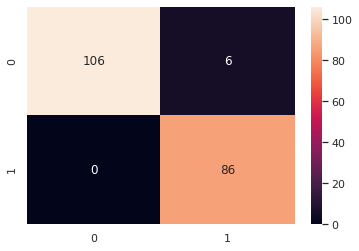

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score,classification_report
from sklearn.preprocessing import LabelEncoder

#Binary format, with B=0 and M=1
#y = y.replace("B", 0)
#y = y.replace("M", 1)

# Para obter as classes como inteiros, utilizamos
# a classe LabelEncoder da scikit-learn

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(data_normal, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

recall = recall_score(y_test,clf_rf.predict(x_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,clf_rf.predict(x_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
ax = sns.heatmap(cm,annot=True,fmt="d")

In [42]:
#Eu inseri esse
#print(classification_report(y_test, y_pred_class))
print(classification_report(y_test, clf_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       112
           1       0.93      1.00      0.97        86

    accuracy                           0.97       198
   macro avg       0.97      0.97      0.97       198
weighted avg       0.97      0.97      0.97       198



# Seleção de características e Aprendizado de Máquina


Nesta seção, selecionaremos recursos com métodos diferentes que são seleção de recursos com correlação, eliminação de recurso recursivo (RFE) e eliminação de recurso recursivo com validação cruzada (RFECV). Usaremos a classificação Random Forest para treinar nosso modelo. 

## 1) Feature Selection with correlation and Random Forest classification

**height,waist e hib** are correlated -> I choose **height**.
**hdl_chol,chol_hdl_ratio** are correlated negative ->  I choose **chol_hdl_ratio**.

In [43]:
drop_list = ['waist','hip','hdl_chol']
x_1 = X.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,cholesterol,glucose,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist_hip_ratio,gender_female,gender_male
0,193,77,3.9,19,61,119,22.5,118,70,0.84,1,0
1,146,79,3.6,19,60,135,26.4,108,58,0.83,1,0
2,217,75,4.0,20,67,187,29.3,110,72,0.89,1,0
3,226,97,3.2,20,64,114,19.6,122,64,0.79,1,0
4,164,91,2.4,20,70,141,20.2,122,86,0.82,1,0


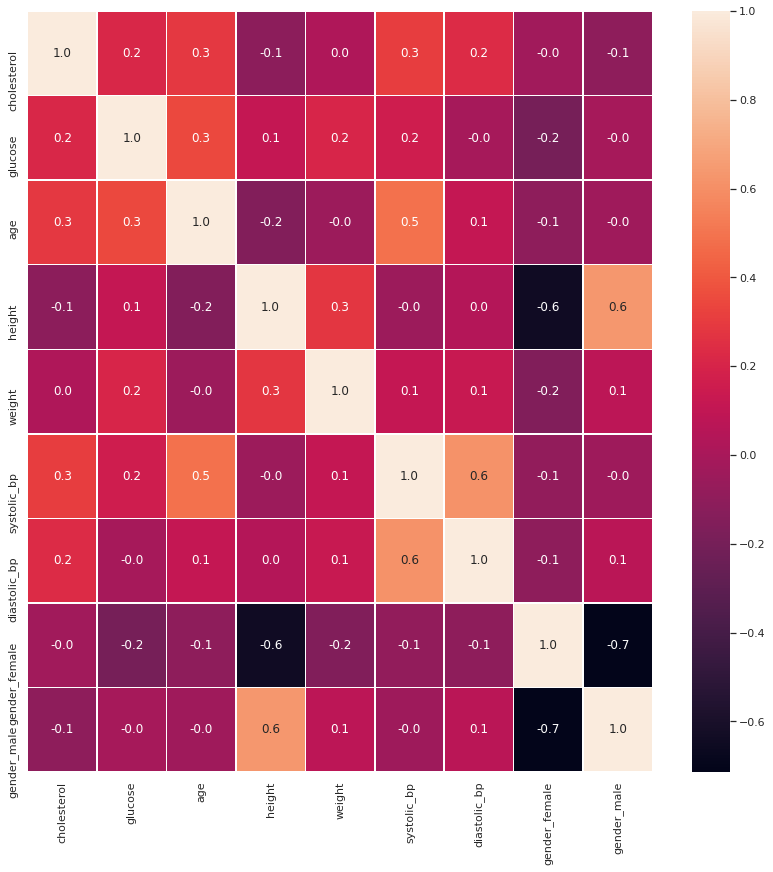

In [44]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
ax = sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Recall is:  1.0
Accuracy is:  0.9696969696969697
F1 score is:  0.9662921348314606


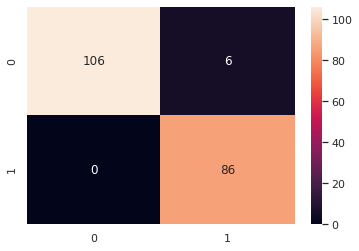

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=42)      
clr_rf = clf_rf.fit(x_train,y_train)

recall = recall_score(y_test,clf_rf.predict(x_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,clf_rf.predict(x_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
ax = sns.heatmap(cm,annot=True,fmt="d")

## 2) Recursive feature elimination (RFE) with Random Forest 
RFE usa um dos métodos de classificação (floresta aleatória) que atribui pesos a cada recurso. Os menores pesos são removidos do conjunto atual de recursos. Esse procedimento é repetido recursivamente no conjunto podado até que o número desejado de recursos seja alcançado.

In [46]:
display(data_normal)

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,gender_female,gender_male
0,0.315068,0.086053,0.342593,0.134831,0.000000,0.375000,0.088496,0.179803,0.17500,0.289474,0.200000,0.235294,0.347826,1.0,0.0
1,0.186301,0.091988,0.268519,0.117978,0.000000,0.333333,0.159292,0.275862,0.11250,0.131579,0.233333,0.294118,0.326087,1.0,0.0
2,0.380822,0.080119,0.388889,0.140449,0.013699,0.625000,0.389381,0.347291,0.12500,0.315789,0.466667,0.441176,0.456522,1.0,0.0
3,0.405479,0.145401,0.537037,0.095506,0.013699,0.500000,0.066372,0.108374,0.20000,0.210526,0.166667,0.264706,0.239130,1.0,0.0
4,0.235616,0.127596,0.509259,0.050562,0.013699,0.750000,0.185841,0.123153,0.20000,0.500000,0.200000,0.264706,0.304348,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.528767,0.905045,0.259259,0.291599,0.630137,0.666667,0.420354,0.345269,0.34375,0.539474,0.466667,0.352941,0.579292,0.0,1.0
656,0.526027,0.240356,0.222222,0.340020,0.342466,0.291667,0.473451,0.647733,0.18125,0.289474,0.500000,0.529412,0.401954,1.0,0.0
657,0.457534,0.210682,0.175926,0.374477,0.287671,0.500000,0.309735,0.324689,0.35000,0.618421,0.333333,0.294118,0.452094,0.0,0.0
658,0.501370,0.474777,0.324074,0.229320,0.671233,0.541667,0.269912,0.287469,0.41250,0.500000,0.266667,0.323529,0.357157,0.0,0.0


In [61]:
#Importando o modelo RFE -> (Wrapper)
from sklearn.feature_selection import RFE

# split data train 70 % and test 30, this time with x and not x_1 in order to have all the features %
x_train, x_test, y_train, y_test = train_test_split(data_normal, y, test_size=0.3, random_state=42)

# Create the RFE object and rank each pixel
clf_rf_2 = RandomForestClassifier(random_state=42)      
rfe = RFE(estimator=clf_rf_2, n_features_to_select=4, step=1)
rfe = rfe.fit(x_train, y_train)

In [62]:
print('Atributos abordagem rfe:',x_train.columns[rfe.support_])

Atributos abordagem rfe: Index(['glucose', 'age', 'bmi', 'systolic_bp'], dtype='object')


In [63]:
type(x_train.columns[rfe.support_])

pandas.core.indexes.base.Index

Recall is:  0.9651162790697675
Accuracy is:  0.9393939393939394
F1 score is:  0.9325842696629213


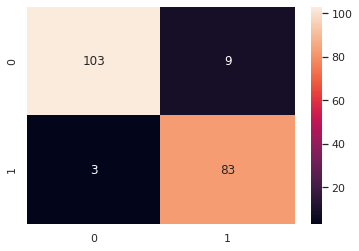

In [64]:
recall = recall_score(y_test,rfe.predict(x_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,rfe.predict(x_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,rfe.predict(x_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,rfe.predict(x_test))
ax = sns.heatmap(cm,annot=True,fmt="d")

## 3) Recursive feature elimination with cross validation and Random Forest classification


In [65]:
from sklearn.feature_selection import RFECV

clf_rf_3 = RandomForestClassifier(random_state=42) 
rfecv = RFECV(estimator=clf_rf_3, step=1, cv=5, scoring='recall')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 9
Best features : Index(['cholesterol', 'glucose', 'chol_hdl_ratio', 'age', 'weight', 'bmi',
       'systolic_bp', 'waist', 'waist_hip_ratio'],
      dtype='object')


In [66]:
type(x_train.columns[rfecv.support_])

pandas.core.indexes.base.Index

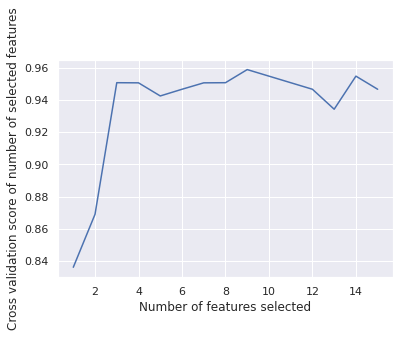

In [67]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Recall is:  0.9883720930232558
Accuracy is:  0.9646464646464646
F1 score is:  0.96045197740113


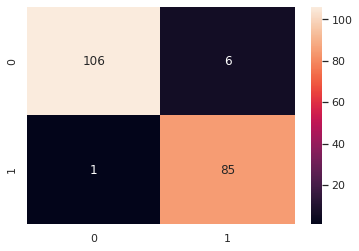

In [68]:
recall = recall_score(y_test,rfecv.predict(x_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,rfecv.predict(x_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,rfecv.predict(x_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,rfecv.predict(x_test))
ax = sns.heatmap(cm,annot=True,fmt="d")

## 4) Utilizando abordagem Filtro

In [55]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [56]:
#Feature selection with Mutual Information 
import numpy
import pandas
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

# split data train 70 % and test 30 %
#x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(data_normal, y, test_size=0.3, random_state=42)

#selector = SelectKBest(score_func=chi2, k=3)
selector = SelectKBest(score_func=mutual_info_classif, k=8)
#selector = SelectKBest(score_func=f_classif, k=42)

#selector.fit(data_normal, y)
selector.fit(x_train, y_train)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
print(cols)

# print the scores
#for i in range(len(selector.scores_)):
 #   print('Feature %d: %f' % (i, selector.scores_[i]))


# plot the scores
'''
plt.bar([i for i in range(len(fit.scores_))], fit.scores_)
plt.show()
'''

[ 1  3  4  7  8  9 11 12]


'\nplt.bar([i for i in range(len(fit.scores_))], fit.scores_)\nplt.show()\n'

In [57]:
# to remove the rest of the features:

x_train = selector.transform(x_train)
x_test = selector.transform(x_test)

Recall is:  1.0
Accuracy is:  0.9747474747474747
F1 score is:  0.9717514124293786


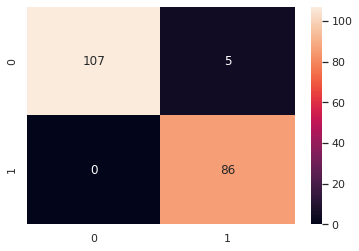

In [58]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=42)      
clr_rf = clf_rf.fit(x_train,y_train)

recall = recall_score(y_test,clf_rf.predict(x_test))
print('Recall is: ', recall)
accuracy = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ', accuracy)
f1 = f1_score(y_test,clf_rf.predict(x_test))
print('F1 score is: ', f1)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
ax = sns.heatmap(cm,annot=True,fmt="d")

# Resultados

## Sem seleção dos atributos:
Recall is:  1.0 \
Accuracy is:  0.9696969696969697 \
F1 score is:  0.9662921348314606 

## Feature Selection with correlation and Random Forest classification:
Recall is:  1.0 \
Accuracy is:  0.9696969696969697\
F1 score is:  0.9662921348314606

## Recursive feature elimination (RFE) with Random Forest:
Recall is:  0.9651162790697675\
Accuracy is:  0.9393939393939394\
F1 score is:  0.9325842696629213

## Recursive feature elimination with cross validation and Random Forest classification:
Recall is:  0.9883720930232558\
Accuracy is:  0.9646464646464646\
F1 score is:  0.96045197740113

## Utilizando abordagem Filtro:
Recall is:  1.0 \
Accuracy is:  0.9747474747474747\
F1 score is:  0.9717514124293786

## Conclusão:
### Analisando os dados, pode-se constatar que os melhores resultados para as métricas, recall, Accuray e F1-Score, foram obtidos pela abordagem filtro, seguido pela execução da base completa e correlação com remoção manual, tendo os mesmos valores. Vale destacar que foram usados os mesmas configurações para todos.